In [86]:
import matplotlib.pyplot as plt
import csv
import numpy as np

with open("../datasets/podst-ext.csv", "r") as f1:
    reader_g = csv.reader(f1)
    with open("../datasets/podst-loc.csv", "r") as f2:
        reader_loc = csv.reader(f2)
        
        data_loc = []
        for l in reader_loc:
            data_loc.append(l)
        
        locations = []
        i = 0
        for g in reader_g:
            for l in data_loc:
                if g[0] == l[0]:
                    if g[1] == 'm.Kraków' and float(l[2]) > 0 and float(l[3]) > 0:
                        locations.append((float(l[2]), float(l[3]), float(g[20]))) 


print(locations)
        
print(len(locations), len(data_loc))
locations = np.asarray(locations)



[(50.089332, 19.94124, 0.7149255489397632), (50.0860984, 19.9170561, 0.485643113308856), (50.0847238, 19.9027096, 0.5868785478902236), (50.084539, 19.847098, 0.6105612431231981), (50.0872962, 19.928737, 0.6150423239460817), (50.0897814, 19.9231717, 0.6480520414938405), (50.05575229999999, 19.9174025, 0.6504311145104903), (50.055802, 19.9043209, 0.6323819113883093), (50.0739619, 19.9217543, 0.7440386681907135), (50.07584749999999, 19.9224642, 0.6620889967464267), (50.0442051, 19.8247563, 0.6381926155985194), (50.0699775, 19.9149319, 0.6372218040076828), (50.084408, 19.882034, 0.7278748415918381), (50.0963489, 19.884809, 0.6607196310244022), (50.0940377, 19.933849, 0.5506420031056045), (50.1068077, 19.9056602, 0.6108984628751973), (50.0641669, 19.8653745, 0.6250635532940311), (50.07342269999999, 19.9003658, 0.6941754660591964), (50.0928321, 19.9476216, 0.6512833071436752), (50.0841861, 19.9222824, 0.8368909950685827), (50.0871414, 19.9284337, 0.6963222437573573), (50.1022455, 19.9442872,

In [ ]:
with open("../datasets/loc-val.csv", "w") as f:
    writer = csv.writer(f)
    
    for e in locations:
        writer.writerow(e)

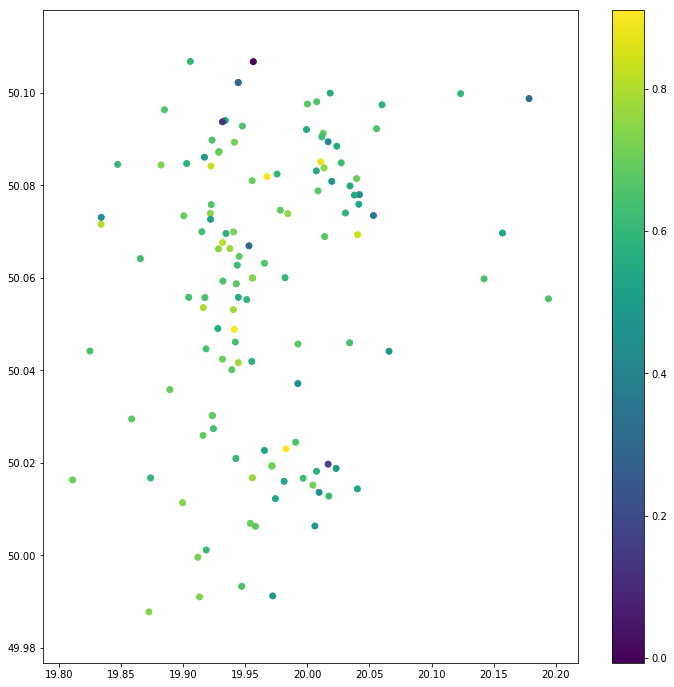

In [91]:
# %pylab inline
# pylab.rcParams['figure.figsize'] = (12, 12)

plt.scatter(locations[...,1], locations[...,0], c = locations[...,2], marker = 'o')
    
plt.colorbar()
plt.show()


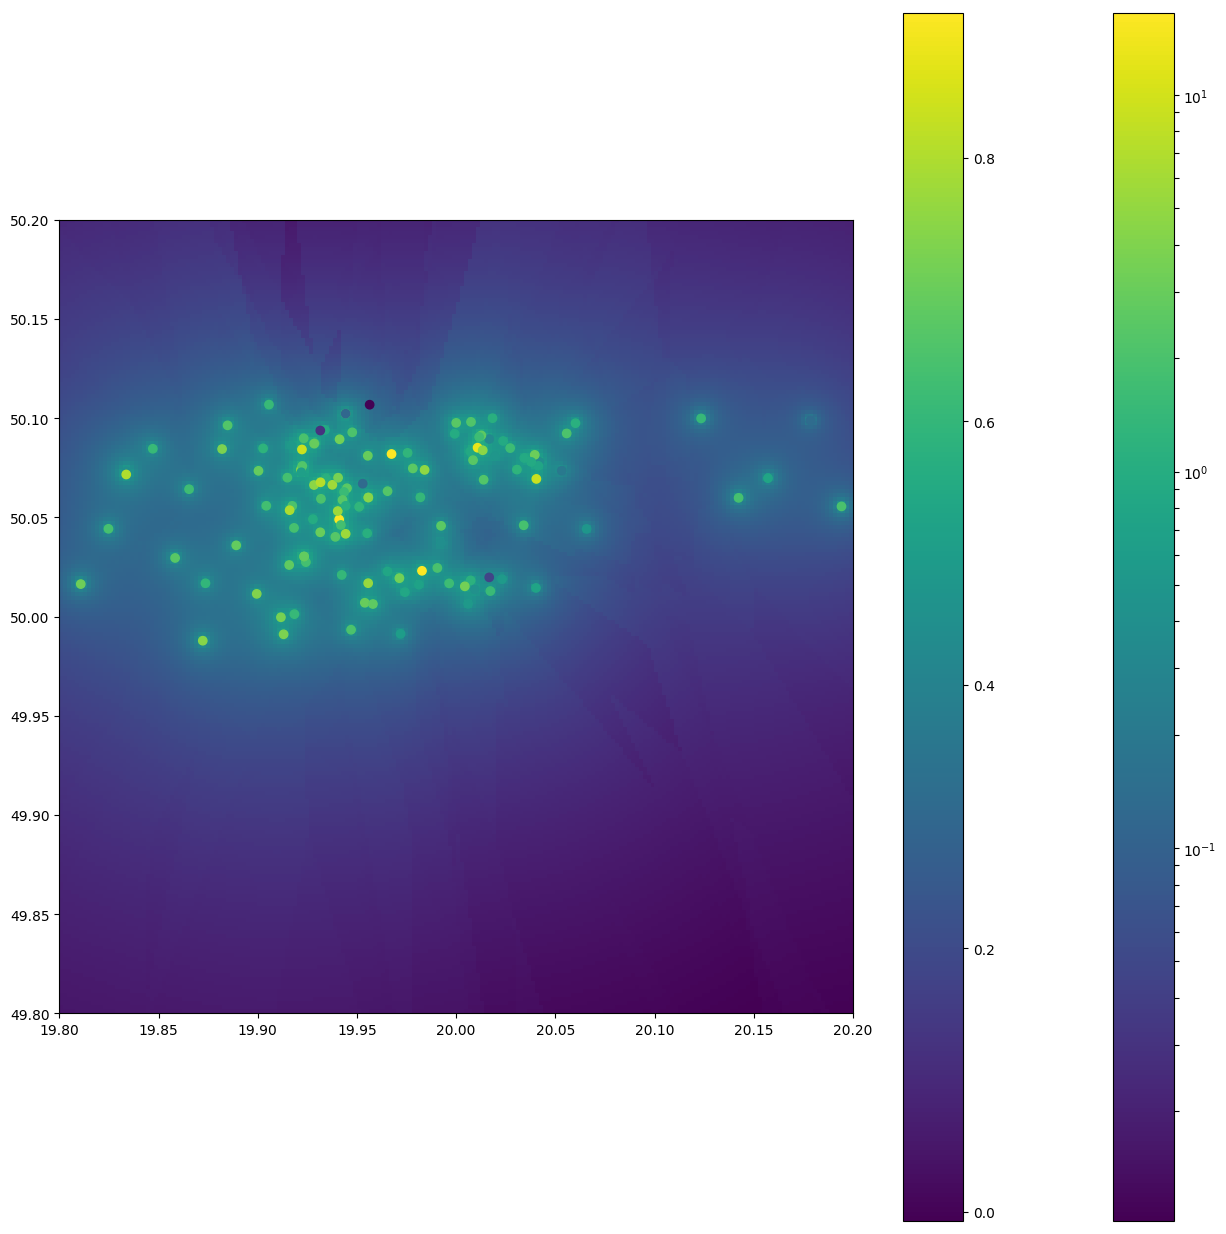

In [146]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize
import math as m
import random as r
import csv

# Parametry grafiki
plt.figure(figsize=(16, 16), dpi=100, facecolor='w', edgecolor='k')
ymin = 49.8
ymax = 50.2
xmin = 19.8
xmax = 20.2
size = 0.2
array_size = 200

# ta funkcja zamienia indeksy i,j na odpowiadające im punkty na płaszczyźnie
def makePoint(i, j, array_size, size, xmin, ymin):
    i, j, array_size, size = float(i), float(j), float(array_size), float(size)
    
    side = 2*size/array_size # dl boku w jednostkach na mapie
    i = array_size -i -1
    
    ni = i*side + side/2
    nj = j*side + side/2
    
    return (nj + xmin, ni + ymin)

def education_cost(x, locations):
    lng, lat = x
    LICZBA_ZNACZACYCH_SZKOL = 5
    
    diff_lat = (locations[...,0] * 1000 - lat *1000) ** 2
    diff_lng = (locations[...,1] *1000 - lng *1000) ** 2
    
    diff = diff_lat + diff_lng
    diff = np.sqrt(diff)
    
#     b = np.zeros((locations.shape[0], locations.shape[1]+1))
#     b[:,:-1] = locations
#     b[:,-1:] = np.reshape(diff,(diff.size, 1))
    sort = np.argsort(diff)
    sort = sort[:LICZBA_ZNACZACYCH_SZKOL]
    diff = diff[sort]
    locations = locations[sort]
#     print(locations)
    values = locations[...,2]/ diff
    
    return np.sum(values)

# Generacja heat-mapy
dummy = []
cost = np.zeros((array_size, array_size))
for i in range(len(cost)):
    for j in range(len(cost[i])):
        cost[i, j] = education_cost(makePoint(i, j, array_size, size, xmin, ymin), locations)

# Rysowanie obrazka
im = plt.imshow(cost, norm = matplotlib.colors.LogNorm(), extent = (xmin, xmax, ymin, ymax))
plt.colorbar()

plt.scatter(locations[...,1], locations[...,0], c = locations[...,2], marker = 'o')
    
plt.colorbar()
plt.show()

# ax = plt.gca()
# for i in range(len(ancors)):
#     circle = plt.Circle(ancors[i], mypoint[i], color='r', fill=False, zorder = 0.2, label='Odległości od punktów pomiarowych')
#     ax.add_artist(circle)
    
# black_dots = plt.scatter([1, -1, 1, -1], [1, 1, -1, -1], color = 'black', label='Punkty pomiarowe')

# steps = np.asarray(steps)
# line = plt.Line2D(steps[...,0] , steps[...,1], color='grey', zorder = 0.3, label='Ścieżka algorytum opymalizującego')
# ax.add_artist(line)

# punkt,  = plt.plot(result.x[0], result.x[1], 'o', color='pink', zorder = 1.0, label = 'Wyznaczony punkt')

# plt.colorbar(im)
# plt.legend(handles=[black_dots, circle, line, punkt], loc ='upper right')#bbox_to_anchor=(0.3, -0.05))
# plt.title("Heat-mapa na obrazku przedstawia funkcję kosztu(MSE), \n wyznaczoną jako suma kwadratów błedów pomiarów od wszystkich punktów pomiarowych.")

# circle2 = plt.Circle(result.x, myMSE(result.x, ancors, mypoint) ** (1/2), color='pink', fill=False, zorder = 1.0)
# ax.add_artist(circle2)

# plt.savefig(savefile, dpi=100, facecolor='w', edgecolor='w')
# print("Zapisano grafikę w pliku %s" % (savefile))